In [9]:
# Импортируем нужные библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt #работает с графиками и диаграммами
import seaborn as sns #работает с графиками и диаграммами

In [45]:
# Сформируем датафрейм на основе скачанного файла
df = pd.read_csv(('winequality-red.csv'), sep = ';')
df.head(2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.0,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5


In [80]:
# На основе переменной quality с оценками вина создать новую переменную good: если quality > 5, то 1, иначе 0 
df['good'] =np.where(df['quality']> 5, 'yes', 'no')
df.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,good
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,no
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,no
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,no
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,yes
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,no


In [ ]:
# Исследовать, какие химические характеристики вина влияют на то, окажется оно хорошим или плохим, 
# с применением не менее 5 диаграмм из урока.


In [82]:
# Выбор стиля оформления диаграмм
plt.style.use('fivethirtyeight') 

# Готовим данные для графика в виде сводной таблицы
data1 = df.groupby('quality')['fixed acidity'].agg(fixed_acidity = 'mean').reset_index().sort_values(by = 'quality', ascending = False)  
data1.head(10)

,quality,fixed_acidity
5,8,8.566667
4,7,8.872362
3,6,8.347179
2,5,8.167254
1,4,7.779245
0,3,8.360000


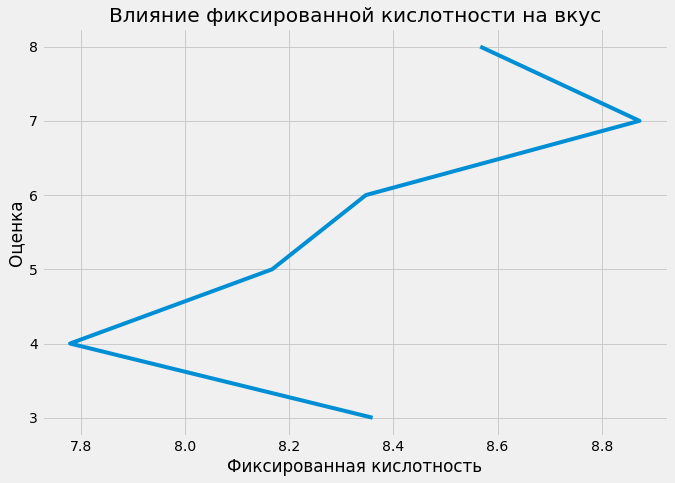

In [83]:
# 01_линейный график

plt.figure(figsize = (10,7))

plt.plot(data1['fixed_acidity'], data1['quality'])

plt.title('Влияние фиксированной кислотности на вкус')
plt.xlabel('Фиксированная кислотность')
plt.ylabel('Оценка')

plt.show()

# Вывод:
# Чем ниже кислотность, тем ниже вкус - прямая зависимость.Однако чрезмерная кислотность - лучший вкус

In [84]:
# Готовим данные для графика в виде сводной таблицы
data2 = df.groupby('quality')['residual sugar'].agg(residual_sugar = 'mean').reset_index().sort_values(by = 'quality', ascending = False)  
data2.head(10)

,quality,residual_sugar
5,8,2.577778
4,7,2.720603
3,6,2.477194
2,5,2.528855
1,4,2.694340
0,3,2.635000


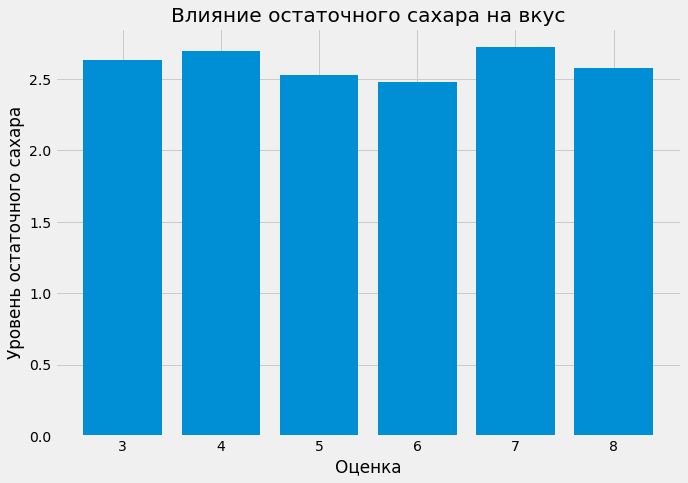

In [86]:
# 02_столбчатая диаграмма
plt.figure(figsize = (10,7))

plt.bar(data2['quality'],data2['residual_sugar'])

plt.title('Влияние остаточного сахара на вкус')
plt.xlabel('Оценка')
plt.ylabel('Уровень остаточного сахара')
plt.xticks(rotation = 0)

plt.show()

# Вывод:
# Самое вкусное вино при остаточном сахаре > 2,5
# Почти все вина являются вкусным и имеют высокий уровнеь остаточного сахара.


In [87]:
# Готовим данные для графика в виде сводной таблицы
data3 = df.groupby('quality')['alcohol'].agg(alcohol = 'mean').reset_index().sort_values(by = 'quality', ascending = False)  
data.head()

,good,alcohol
0,0,9.4
1,0,9.8
2,0,9.8
3,1,9.8
4,0,9.4


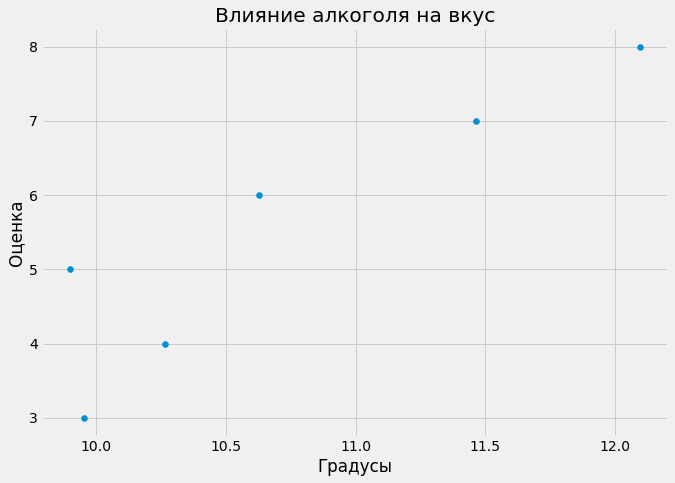

In [88]:
# 03_диаграмма рассеяния

plt.figure(figsize = (10,7))

plt.scatter(data3['alcohol'], data3['quality'])

plt.title('Влияние алкоголя на вкус')
plt.xlabel('Градусы')
plt.ylabel('Оценка')

plt.show()

# Вывод:
# Чем выше крепость вина, тем лучше его вкус

In [89]:
# Готовим данные для графика
data4 = df['good'].value_counts()
data4.head()

yes    855
no     744
Name: good, dtype: int64

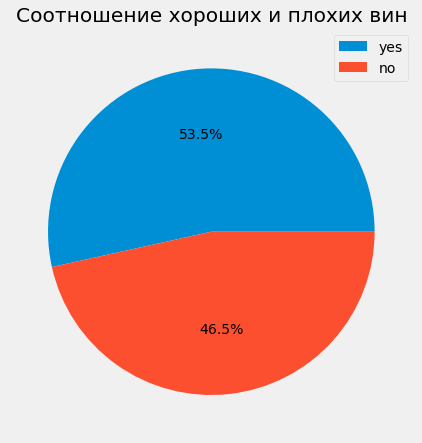

In [95]:
# 04_круговая диаграмма

plt.figure(figsize = (10,7))

plt.pie(data4, autopct='%1.1f%%')

plt.title('Соотношение хороших и плохих вин')
plt.legend(data4.index)

plt.show()

# Вывод:
# Хороших вин больше

In [96]:
# Строим корреляциогнную матрицу
correlation = df.corr()
correlation

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


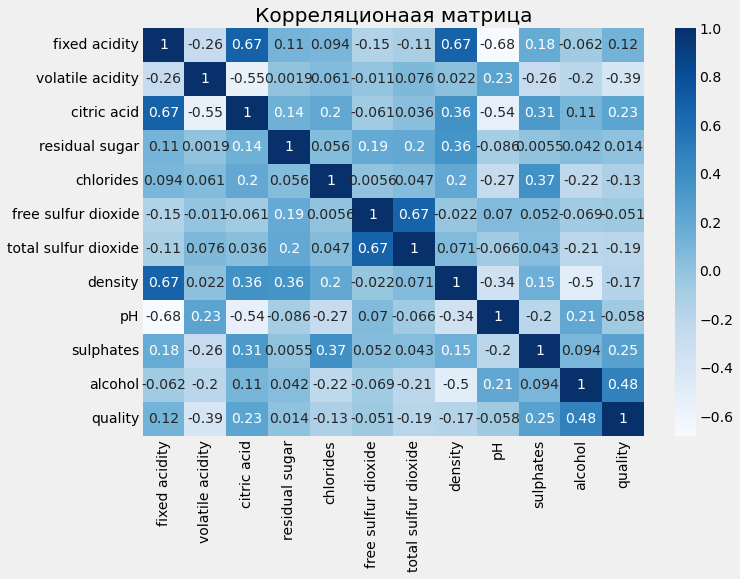

In [97]:
# Строим хитмэп по матрице корреляций
plt.figure(figsize = (10,7))
sns.heatmap(correlation, cmap = 'Blues', annot = True)
plt.title('Корреляционаая матрица')
plt.show()

# Вывод:
#  Самая сильная зависимость у пар: 
#     1)density(плотности) и fixed acidity(фиксированная кислотность)
#     2)citric acid(лимонная кислота) и fixed acidity(фиксированная кислотность)